In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt  


from collections import Counter
from collections import defaultdict

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_confusion_matrix

# Data Preparation

In [2]:
df_train = pd.read_csv('train_data.csv') 
df_test = pd.read_csv('test_data.csv')

In [3]:

df_train = df_train.drop(columns=[
     'averageRating', 'originalTitle', 
])

df_test = df_test.drop(columns=[
     'averageRating', 'originalTitle', 
])

In [4]:
df_train

startYear  runtimeMinutes  totalImages  totalVideos  \
0            1924            58.0            0            0   
1            2007           312.0            4            0   
2            2014            60.0            0            0   
3            2020            73.0           10            0   
4            1979            10.0            1            0   
...           ...             ...          ...          ...   
103672       2019            30.0           25            0   
103673       2006            91.0            1            0   
103674       1990            89.0           22            0   
103675       2004            55.0            3            0   
103676       1946           110.0            2            0   

        criticReviewsTotal  titleType  canHaveEpisodes  isAdult  numRegions  \
0                        0      36046            False    False           1   
1                        0       1593             True    False           6   
2                        0      70825            False    False           1   
3                        0       1145            False    False           1   
4                        0      16375            False    False           5   
...                    ...        ...              ...      ...         ...   
103672                   0      70825            False    False           0   
103673                   0      70825            False    False           1   
103674                   0       6052            False    False          12   
103675                   1       1774            False    False           5   
103676                   0      36046            False    False           2   

        userReviewsTotal  ...  castNumber  companiesNumber  regions  \
0                      0  ...          10                4    92796   
1                      0  ...          31               11   189220   
2                      0  ...           2                0     6735   
3                      1  ...          31                1    92796   
4                      0  ...           3                2   170668   
...                  ...  ...         ...              ...      ...   
103672                 1  ...          23                0    92796   
103673                 0  ...          14               36    19812   
103674                 3  ...          28                7   235510   
103675                 1  ...          32                6   156792   
103676                 1  ...          39                2    17867   

        writerCredits  directorsCredits  soundMixes  quotesTotal  winningRate  \
0                   0                 1        3410            0          0.0   
1                   0                 0       78768            0          0.0   
2                   0                 0       78768            0          0.0   
3                   1                 1       78768            0          0.0   
4                   2                 1       48596            0          0.0   
...               ...               ...         ...          ...          ...   
103672              3                 2       78768            0          0.0   
103673              2                 1       78768            0          0.0   
103674              1                 1       78768           10          0.0   
103675              2                 4       78768            1          0.0   
103676              1                 1       48596            0          0.0   

        Continents   rating  
0            91451   (5, 6]  
1            23833   (7, 8]  
2            23833   (8, 9]  
3            91451   (8, 9]  
4            16536   (6, 7]  
...            ...      ...  
103672       91451  (9, 10]  
103673       23833   (6, 7]  
103674       91451   (5, 6]  
103675       15133   (7, 8]  
103676       23833   (5, 6]  

[103677 rows x 22 columns]

In [5]:
df_train.describe().T

count          mean           std     min      25%  \
startYear           103677.0   1994.983227     24.864944  1878.0   1981.0   
runtimeMinutes      103677.0     51.415907     37.236870     0.0     30.0   
totalImages         103677.0      6.903180     34.772491     0.0      1.0   
totalVideos         103677.0      0.132112      1.060287     0.0      0.0   
criticReviewsTotal  103677.0      1.322029      5.660299     0.0      0.0   
titleType           103677.0  45445.012086  26175.358676   269.0  16375.0   
numRegions          103677.0      2.558648      4.225739     0.0      1.0   
userReviewsTotal    103677.0      2.725117     14.682973     0.0      0.0   
ratingCount         103677.0    297.639042   1829.800661     5.0     12.0   
genres              103677.0  50144.075060  28068.059229  1659.0  23265.0   
castNumber          103677.0     17.623726     48.405809     0.0      5.0   
companiesNumber     103677.0      5.454807     19.922640     0.0      1.0   
regions             103677.0  91593.061894  60681.062461  5788.0  40092.0   
writerCredits       103677.0      1.997270      2.468803     0.0      0.0   
directorsCredits    103677.0      0.944289      0.756903     0.0      1.0   
soundMixes          103677.0  59471.564387  24491.093071  1924.0  48596.0   
quotesTotal         103677.0      0.785063      3.494119     0.0      0.0   
winningRate         103677.0      0.051949      0.199823     0.0      0.0   
Continents          103677.0  63697.737386  36253.976854  1046.0  23833.0   

                        50%      75%       max  
startYear            2001.0   2015.0    2024.0  
runtimeMinutes         34.0     80.0     780.0  
totalImages             1.0      4.0    3350.0  
totalVideos             0.0      0.0      99.0  
criticReviewsTotal      0.0      0.0     196.0  
titleType           36046.0  70825.0   70825.0  
numRegions              1.0      2.0      68.0  
userReviewsTotal        0.0      1.0    1443.0  
ratingCount            28.0    102.0  131545.0  
genres              52753.0  68918.0  118971.0  
castNumber             11.0     21.0    4628.0  
companiesNumber         2.0      5.0     570.0  
regions             92796.0  92796.0  370650.0  
writerCredits           1.0      3.0      51.0  
directorsCredits        1.0      1.0      33.0  
soundMixes          78768.0  78768.0  157536.0  
quotesTotal             0.0      0.0     131.0  
winningRate             0.0      0.0       1.0  
Continents          91451.0  91451.0  149509.0

In [6]:
df_train.dtypes


startYear               int64
runtimeMinutes        float64
totalImages             int64
totalVideos             int64
criticReviewsTotal      int64
titleType               int64
canHaveEpisodes          bool
isAdult                  bool
numRegions              int64
userReviewsTotal        int64
ratingCount             int64
genres                  int64
castNumber              int64
companiesNumber         int64
regions                 int64
writerCredits           int64
directorsCredits        int64
soundMixes              int64
quotesTotal             int64
winningRate           float64
Continents              int64
rating                 object
dtype: object

In [7]:
my_dict = {
    '(0, 1]': 0,
    '(1, 2]': 0,
    '(2, 3]': 0,
    '(3, 4]': 0,
    '(4, 5]': 1,
    '(5, 6]': 1,
    '(6, 7]': 2,
    '(7, 8]': 3,
    '(8, 9]': 4,
    '(9, 10]': 5,
}
df_train['rating'] = df_train['rating'].map(my_dict)
df_test['rating'] = df_test['rating'].map(my_dict)

In [8]:
X_train = df_train.drop(columns=["rating"])
y_train = df_train["rating"]
X_test = df_test.drop(columns=["rating"])
y_test = df_test["rating"]

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

# Fit on training data, then transform both train and test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
Counter(y_train)

Counter({0: 33617, 1: 2990})

In [16]:
ctr = Counter(y_train)
ctr

Counter({0: 33617, 1: 2990})

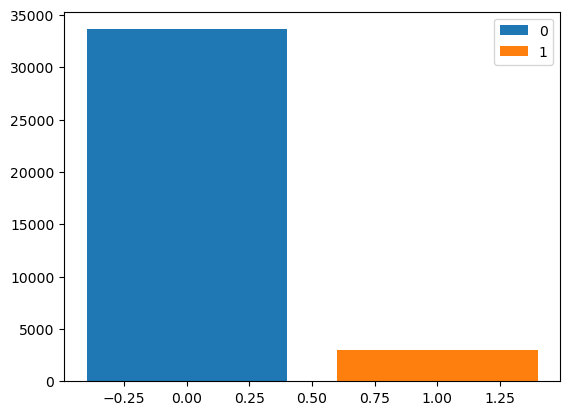

In [17]:
plt.bar(ctr.keys(), ctr.values(), label=ctr.keys(), color=['tab:blue', 'tab:orange'])
plt.legend()
plt.show()

In [33]:
from sklearn.decomposition import PCA

In [34]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

In [35]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)
print(X_train.shape, X_pca.shape)

(36607, 21) (36607, 2)


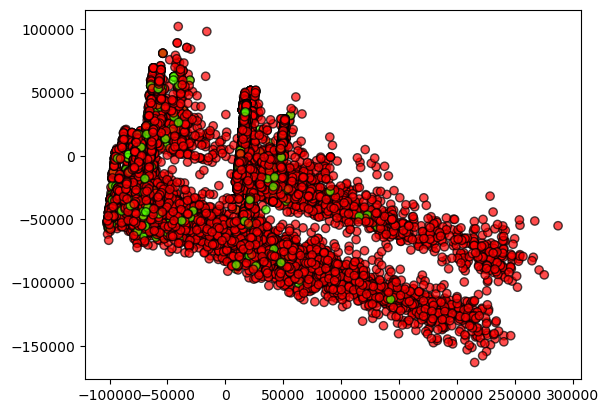

In [36]:
plot_pca(X_pca, y_train)

# Undersampling

In [37]:
# !pip install imblearn

In [38]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [39]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 2990, 1: 2990})


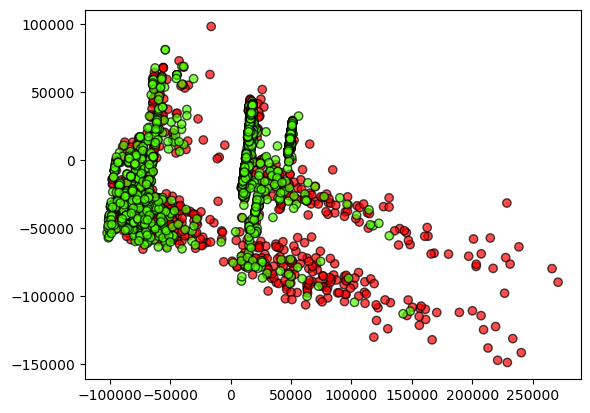

In [40]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [41]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_rus = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_rus = random_search.best_estimator_

CPU times: total: 32.9 s
Wall time: 3min 9s


In [42]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 7, 'criterion': 'entropy'} 0.7158797166882473


Accuracy 0.6511983681795003
F1-score [0.77081588 0.2704    ]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77     14407
           1       0.16      0.79      0.27      1281

    accuracy                           0.65     15688
   macro avg       0.57      0.72      0.52     15688
weighted avg       0.91      0.65      0.73     15688



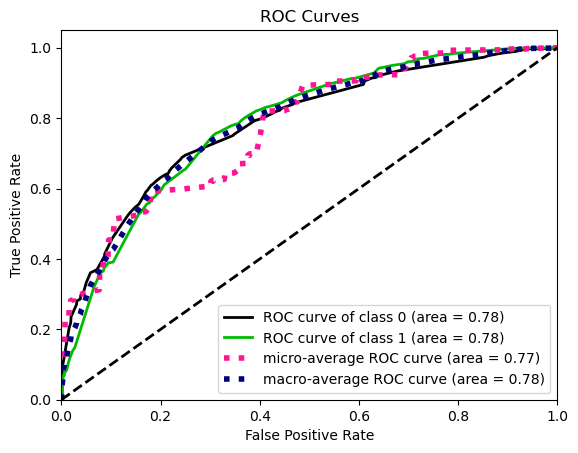

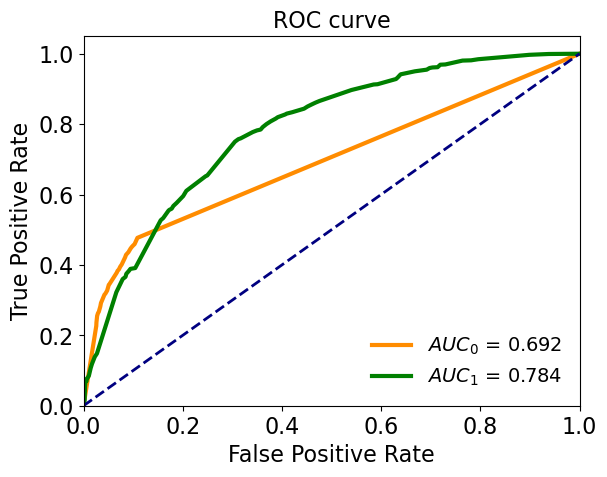

In [43]:


# predict
y_pred = clf_rus.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_rus.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

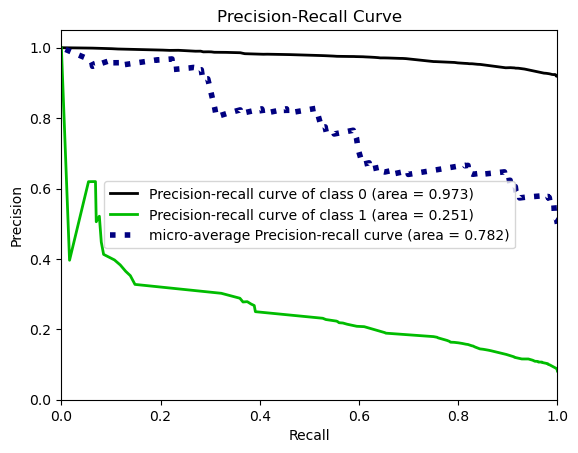

In [44]:
plot_precision_recall(y_test, clf_rus.predict_proba(X_test))
plt.show()

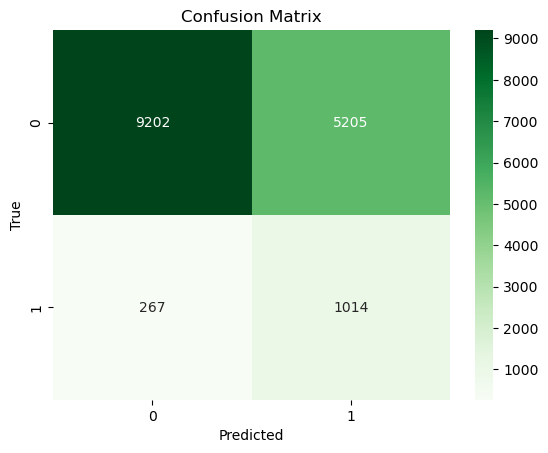

In [45]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### CondensedNearestNeighbour

In [46]:
import warnings
warnings.simplefilter("ignore")

In [47]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 5272, 1: 2990})


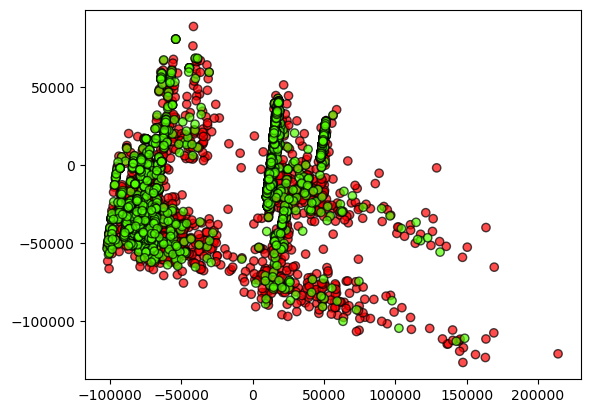

In [48]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [49]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_cnn = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_cnn = random_search.best_estimator_

CPU times: total: 1min 34s
Wall time: 5min 7s


In [50]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 16, 'criterion': 'gini'} 0.49545630156735604


Accuracy 0.8057113717491076
F1-score [0.88751107 0.28785047]
              precision    recall  f1-score   support

           0       0.95      0.83      0.89     14407
           1       0.21      0.48      0.29      1281

    accuracy                           0.81     15688
   macro avg       0.58      0.66      0.59     15688
weighted avg       0.89      0.81      0.84     15688



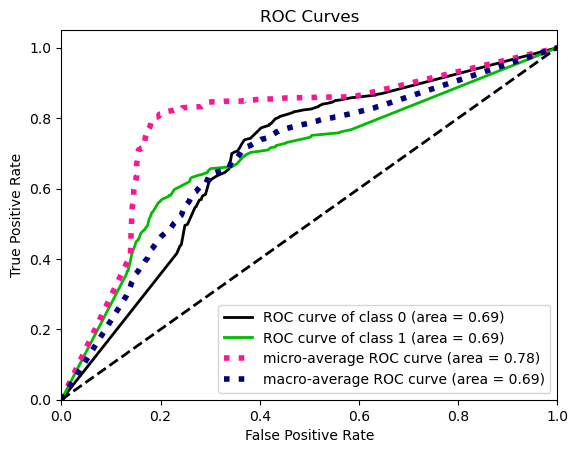

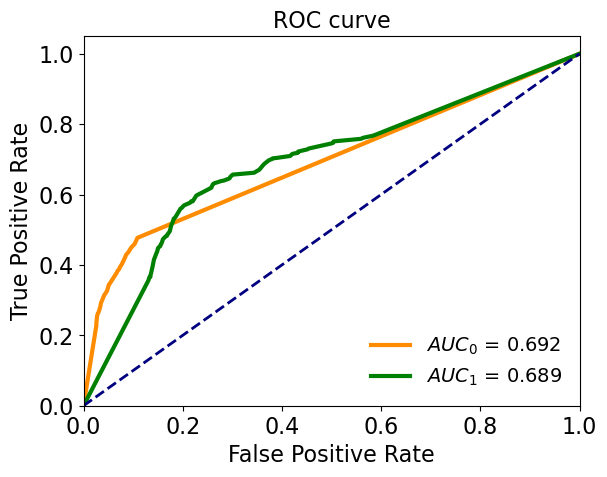

In [51]:


# predict
y_pred = clf_cnn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_cnn.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

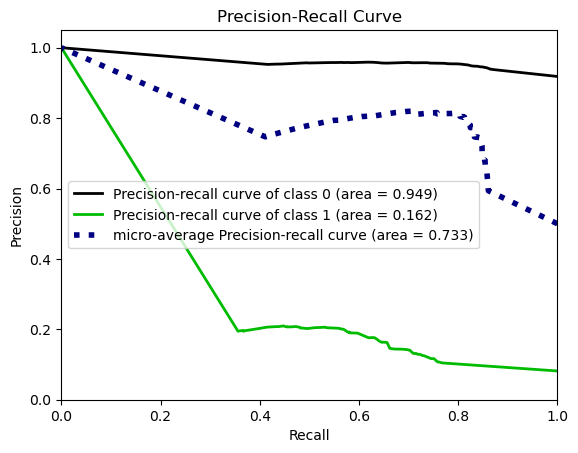

In [52]:
plot_precision_recall(y_test, clf_cnn.predict_proba(X_test))
plt.show()

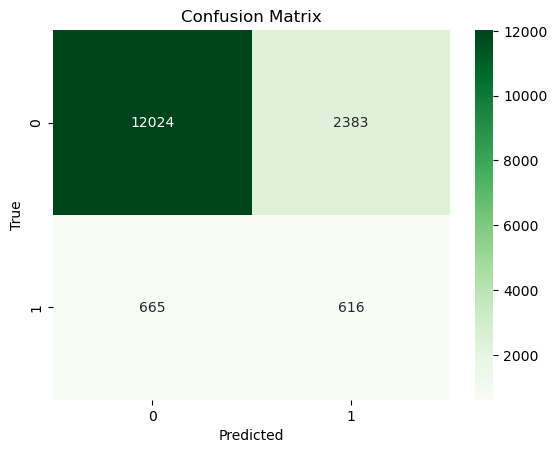

In [53]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Tomek Links

In [54]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 32778, 1: 2990})


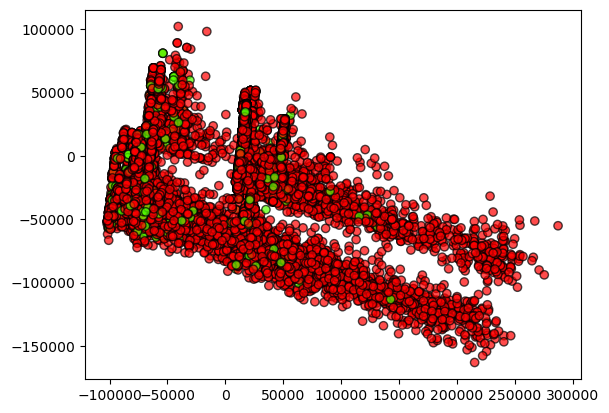

In [55]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [56]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_tl = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_tl = random_search.best_estimator_

CPU times: total: 6min 22s
Wall time: 17min 43s


In [57]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'} 0.35710234044054157


Accuracy 0.8953340132585416
F1-score [0.94285913 0.3780303 ]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14407
           1       0.37      0.39      0.38      1281

    accuracy                           0.90     15688
   macro avg       0.66      0.66      0.66     15688
weighted avg       0.90      0.90      0.90     15688



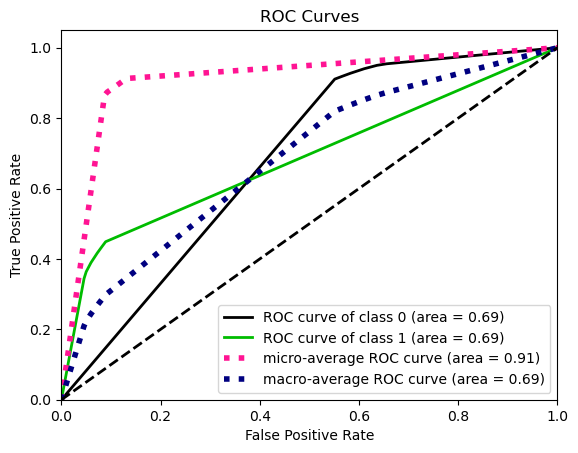

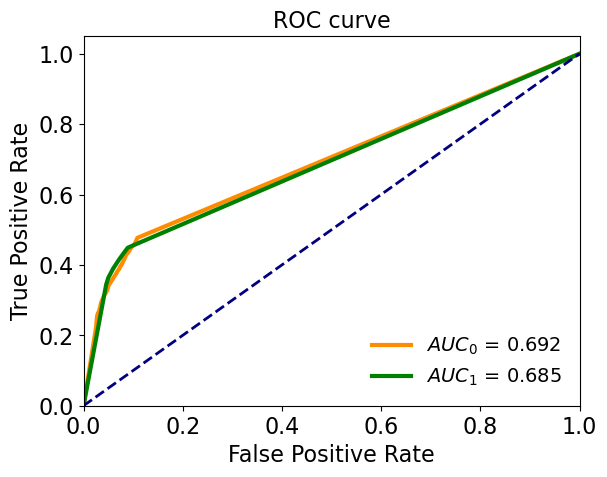

In [58]:


# predict
y_pred = clf_tl.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_tl.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

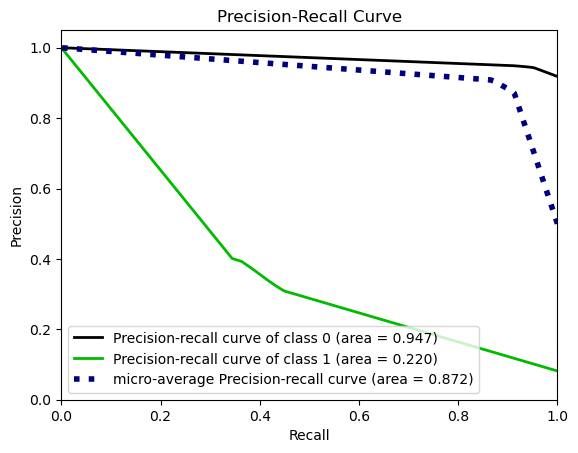

In [59]:
plot_precision_recall(y_test, clf_tl.predict_proba(X_test))
plt.show()

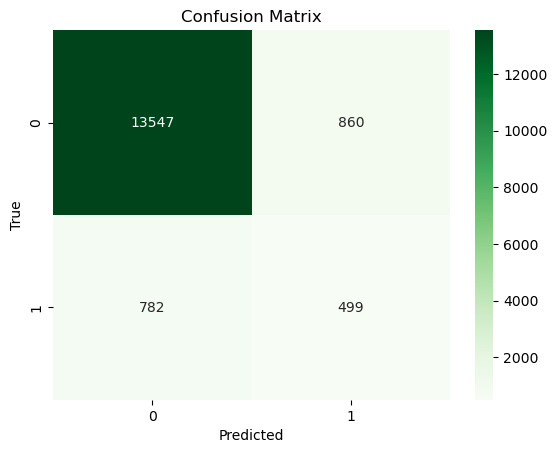

In [60]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Edited Nearest Neighbors

In [61]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 29004, 1: 2990})


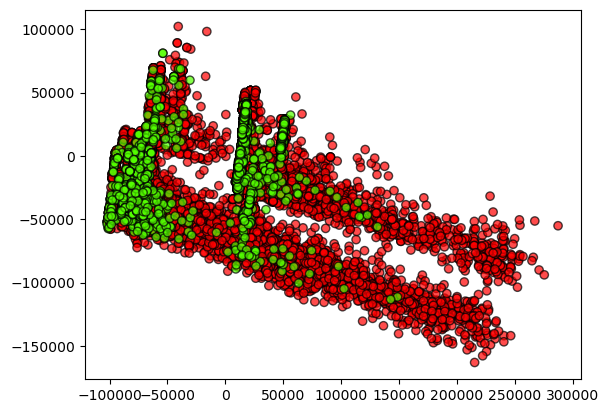

In [62]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [63]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_enn = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_enn = random_search.best_estimator_

CPU times: total: 5min 46s
Wall time: 15min 29s


In [64]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'} 0.41762593913791013


Accuracy 0.8886409994900561
F1-score [0.93902907 0.3584282 ]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     14407
           1       0.34      0.38      0.36      1281

    accuracy                           0.89     15688
   macro avg       0.64      0.66      0.65     15688
weighted avg       0.89      0.89      0.89     15688



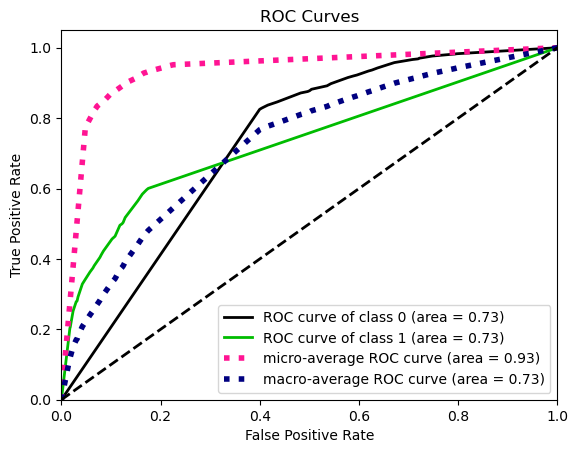

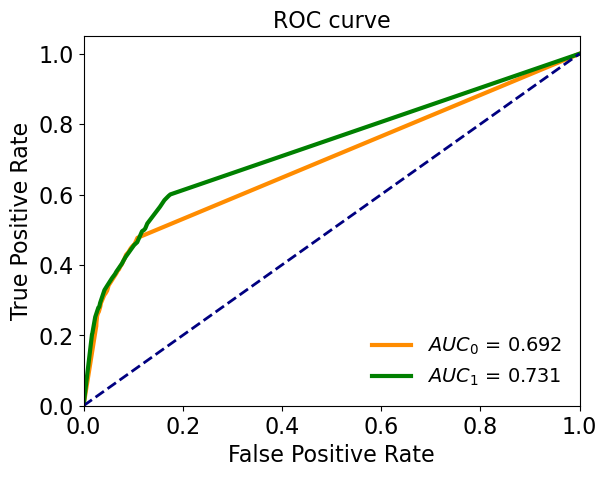

In [65]:

# predict
y_pred = clf_enn.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_enn.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

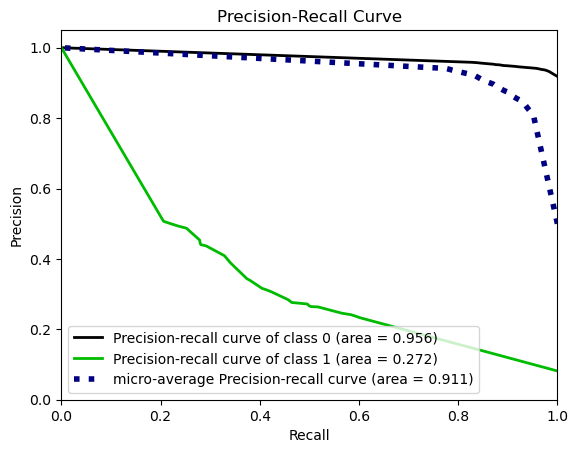

In [66]:
plot_precision_recall(y_test, clf_enn.predict_proba(X_test))
plt.show()

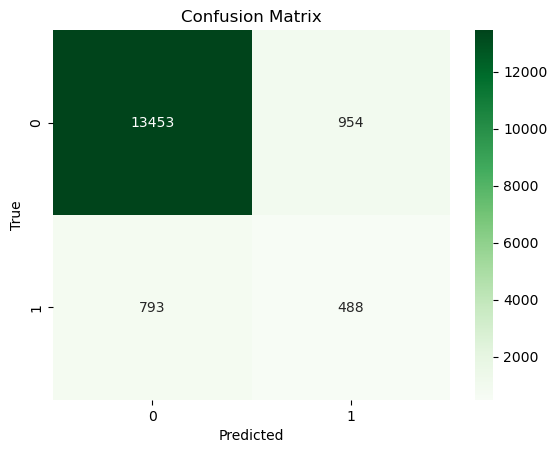

In [67]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Cluster Centroids

In [68]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [69]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 2990, 1: 2990})


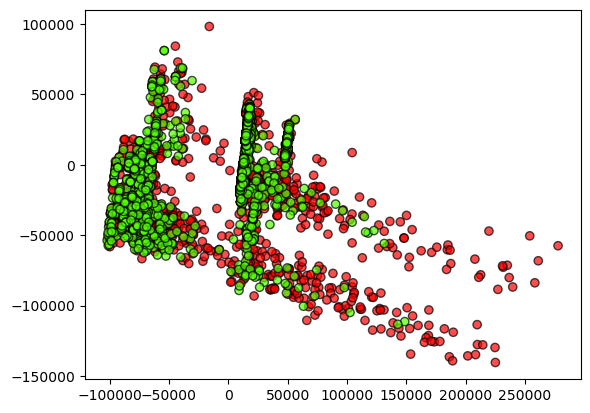

In [70]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [71]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_cc = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_cc = random_search.best_estimator_

CPU times: total: 1min 1s
Wall time: 3min 36s


In [72]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 30, 'min_samples_leaf': 5, 'max_depth': 15, 'criterion': 'gini'} 0.8520293519511338


Accuracy 0.5631055583885772
F1-score [0.69336077 0.24046986]
              precision    recall  f1-score   support

           0       0.98      0.54      0.69     14407
           1       0.14      0.85      0.24      1281

    accuracy                           0.56     15688
   macro avg       0.56      0.69      0.47     15688
weighted avg       0.91      0.56      0.66     15688



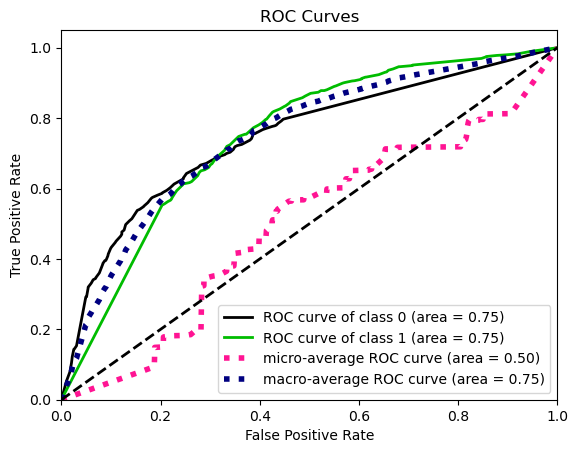

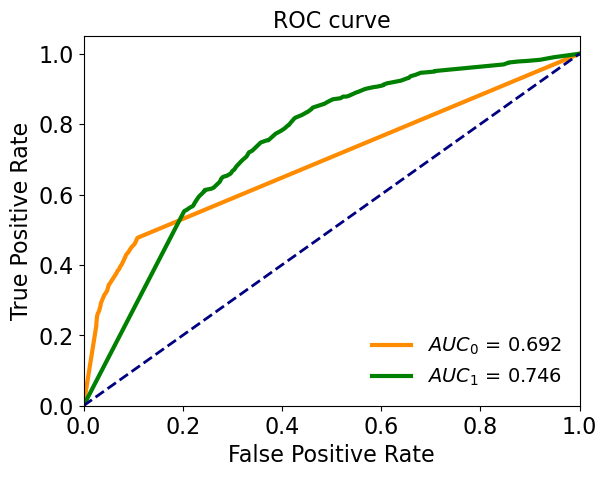

In [73]:


# predict
y_pred = clf_cc.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_cc.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

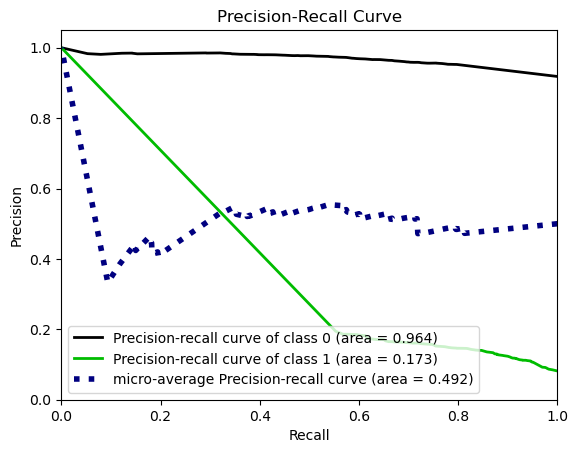

In [74]:
plot_precision_recall(y_test, clf_cc.predict_proba(X_test))
plt.show()

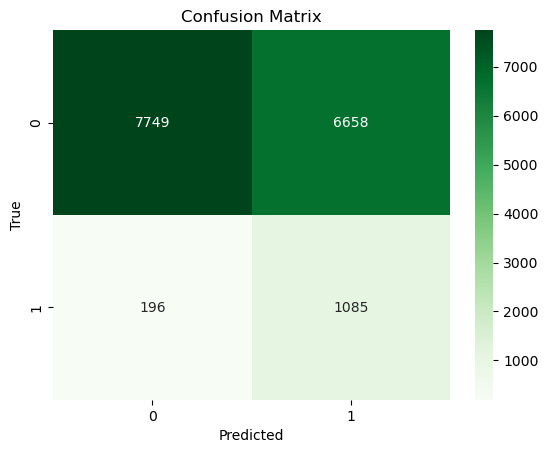

In [75]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Oversampling

In [76]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler

In [77]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 33617, 1: 33617})


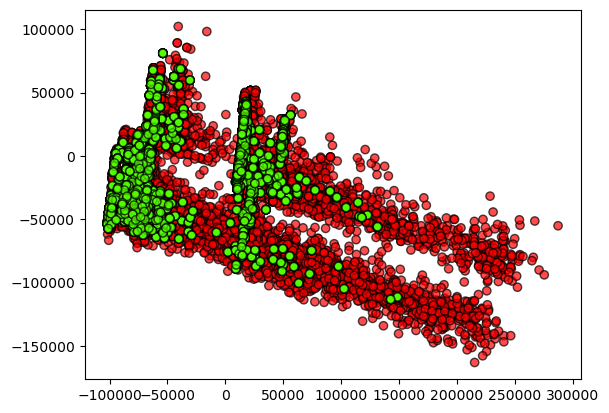

In [78]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [79]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_ros = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_ros = random_search.best_estimator_

CPU times: total: 12min 40s
Wall time: 35min 15s


In [80]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'} 0.965811965483678


Accuracy 0.8986486486486487
F1-score [0.94488353 0.3710443 ]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     14407
           1       0.38      0.37      0.37      1281

    accuracy                           0.90     15688
   macro avg       0.66      0.66      0.66     15688
weighted avg       0.90      0.90      0.90     15688



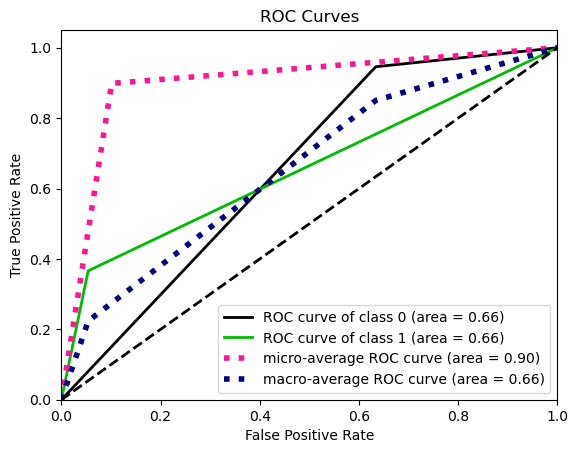

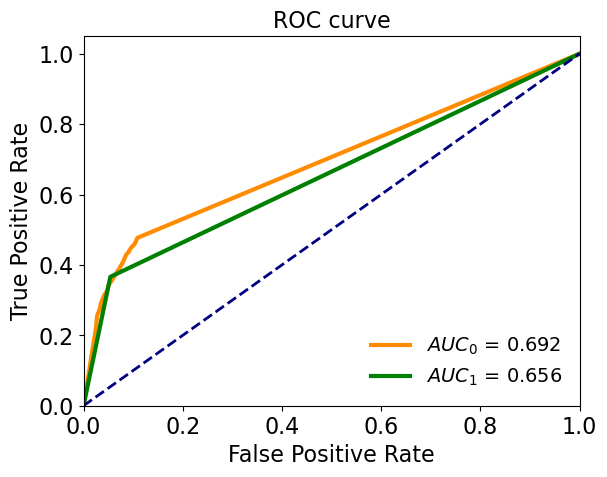

In [81]:


# predict 
y_pred = clf_ros.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_ros.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

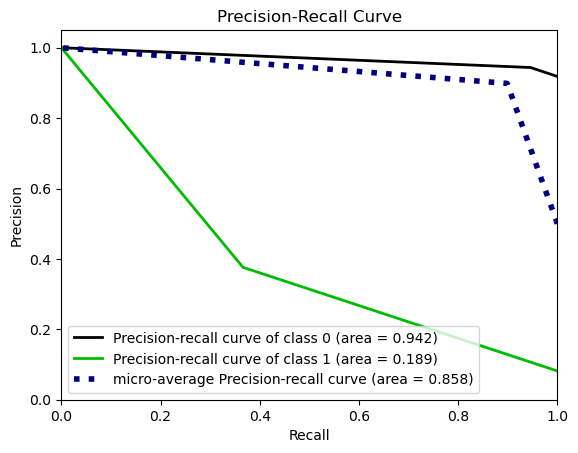

In [82]:
plot_precision_recall(y_test, clf_ros.predict_proba(X_test))
plt.show()

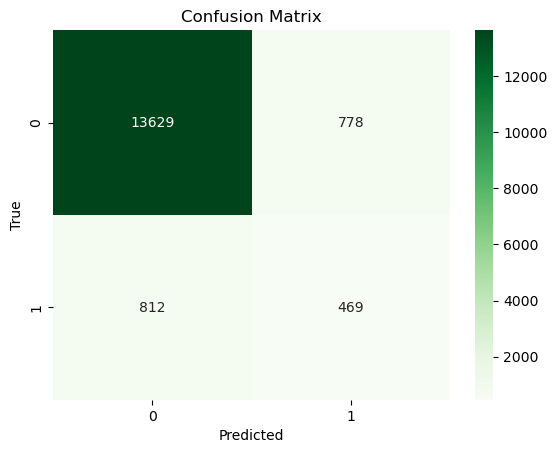

In [83]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### SMOTE

In [84]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 33617, 1: 33617})


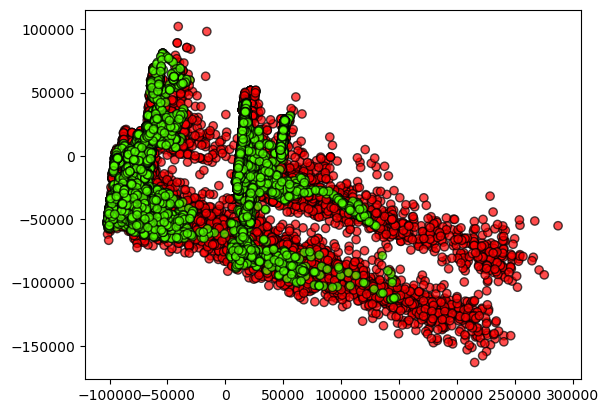

In [85]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [86]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_sm = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_sm = random_search.best_estimator_

CPU times: total: 12min 23s
Wall time: 39min 12s


In [87]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 18, 'criterion': 'entropy'} 0.8678749172190713


Accuracy 0.8156552779194288
F1-score [0.89244273 0.35561497]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     14407
           1       0.25      0.62      0.36      1281

    accuracy                           0.82     15688
   macro avg       0.61      0.73      0.62     15688
weighted avg       0.90      0.82      0.85     15688



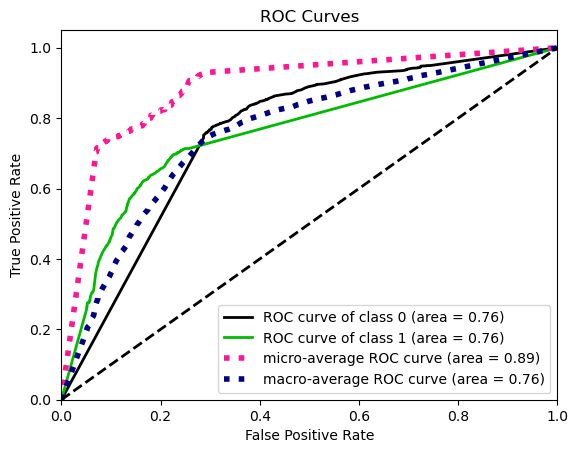

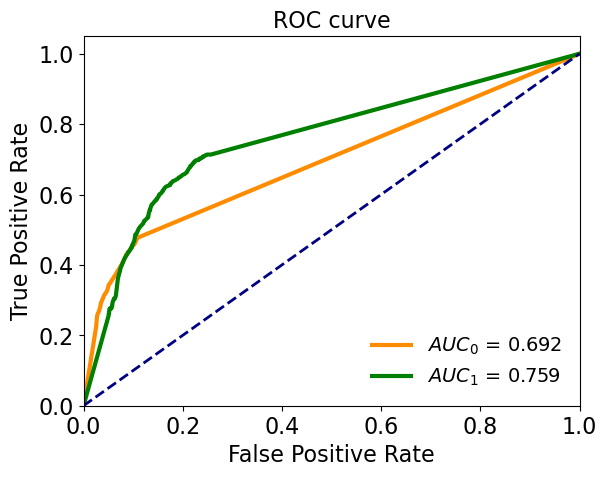

In [88]:


# predict
y_pred = clf_sm.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_sm.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

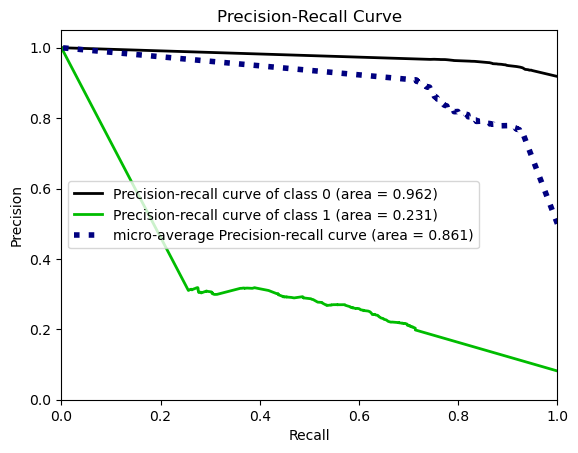

In [89]:
plot_precision_recall(y_test, clf_sm.predict_proba(X_test))
plt.show()

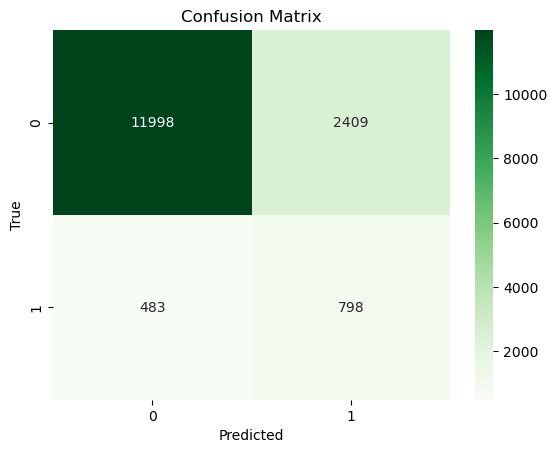

In [90]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### ADASYN

In [91]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 33617, 1: 33524})


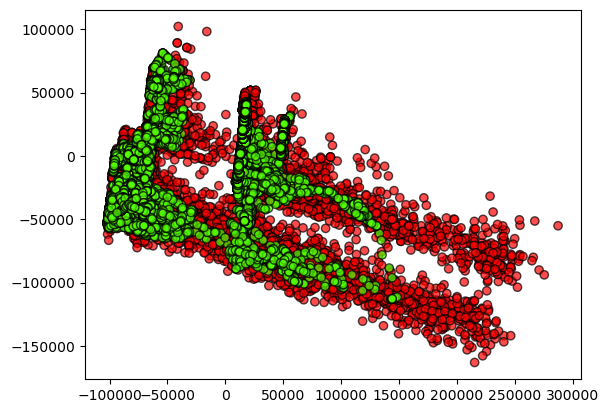

In [92]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

In [93]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy']
}

clf_ad = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_res, y_res)
clf_ad = random_search.best_estimator_

CPU times: total: 12min 16s
Wall time: 40min 40s


In [94]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 19, 'criterion': 'entropy'} 0.868606370115399


Accuracy 0.8069862315145334
F1-score [0.88693899 0.34087941]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89     14407
           1       0.24      0.61      0.34      1281

    accuracy                           0.81     15688
   macro avg       0.60      0.72      0.61     15688
weighted avg       0.90      0.81      0.84     15688



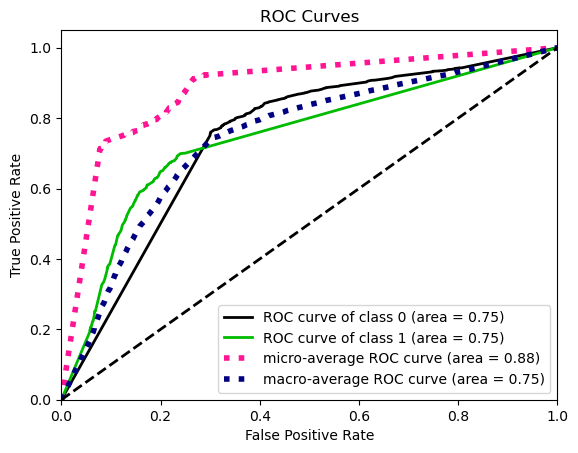

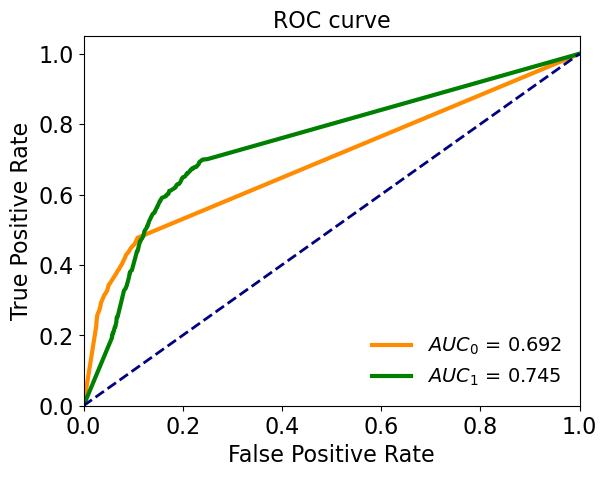

In [95]:


# predict
y_pred = clf_ad.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_ad.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

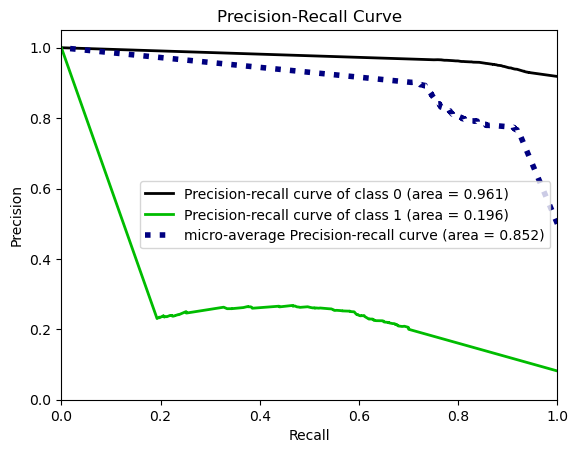

In [96]:
plot_precision_recall(y_test, clf_ad.predict_proba(X_test))
plt.show()

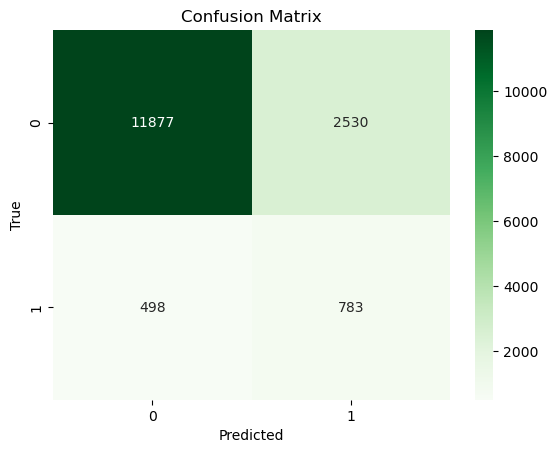

In [97]:
cf = confusion_matrix(y_test, y_pred)
sns.heatmap(cf, annot=True, cmap="Greens", fmt='d')  # fmt='d' to show integer values
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Balancing at the Algorithm Level

### Class Weight

In [98]:
%%time
param_list = {
    'max_depth': [None] + list(np.arange(2, 20)),
    'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
    'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
    'criterion': ['gini', 'entropy'],
    'class_weight': [
        'balanced', 
        None, 
        {0: 1, 1: 2}, 
        {0: 1, 1: 3}, 
        {0: 1, 1: 5}, 
        {0: 1, 1: 10},
        {0: 1, 1: 20}, 
    
    ]

}

clf_cw = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_list,
    scoring='f1',
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    refit=True,
    n_iter=200,
    #verbose=2
)

random_search.fit(X_test, y_test)
clf_cw = random_search.best_estimator_

CPU times: total: 51.3 s
Wall time: 6min 54s


In [99]:
print(random_search.best_params_, random_search.best_score_)

{'min_samples_split': 50, 'min_samples_leaf': 20, 'max_depth': 13, 'criterion': 'gini', 'class_weight': {0: 1, 1: 3}} 0.34075119667566417


Accuracy 0.9047679755226925
F1-score [0.94757159 0.48125   ]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     14407
           1       0.43      0.54      0.48      1281

    accuracy                           0.90     15688
   macro avg       0.70      0.74      0.71     15688
weighted avg       0.92      0.90      0.91     15688



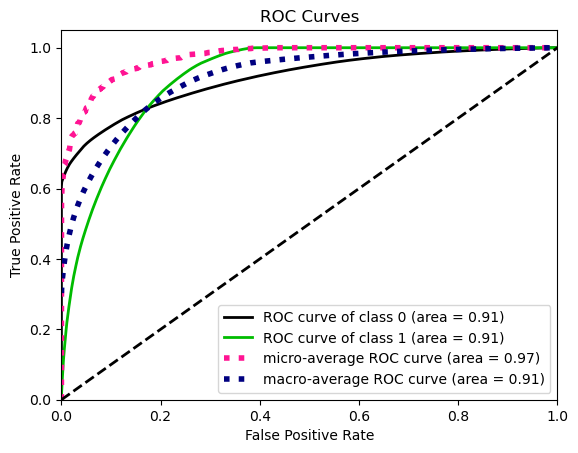

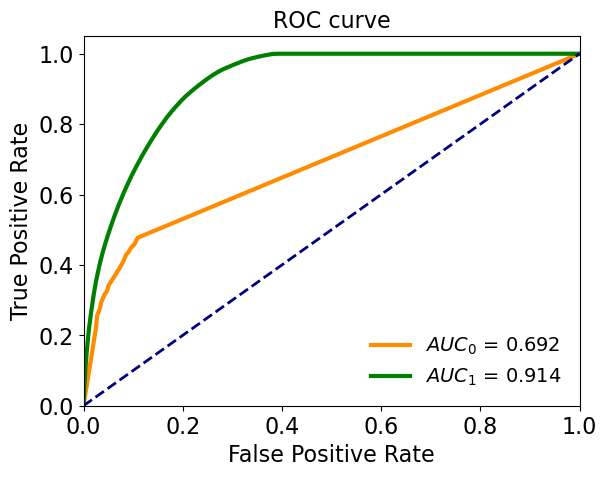

In [100]:


# predict
y_pred = clf_cw.predict(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_cw.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

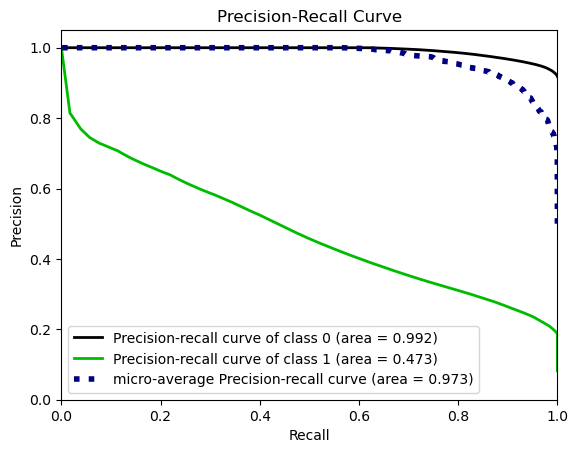

In [101]:
plot_precision_recall(y_test, clf_cw.predict_proba(X_test))
plt.show()

### Decision Threshold

Decision Threshold adjustment is a post training techniques we adjust the threshold of baseline decision tree

Accuracy 0.8772947475777665
F1-score [0.93204843 0.36823105]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93     14407
           1       0.32      0.44      0.37      1281

    accuracy                           0.88     15688
   macro avg       0.63      0.68      0.65     15688
weighted avg       0.90      0.88      0.89     15688



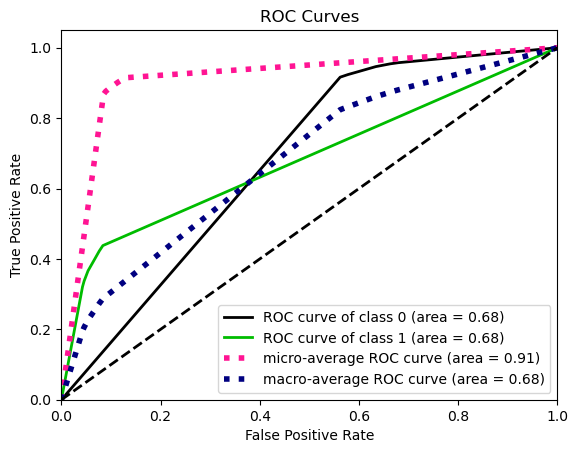

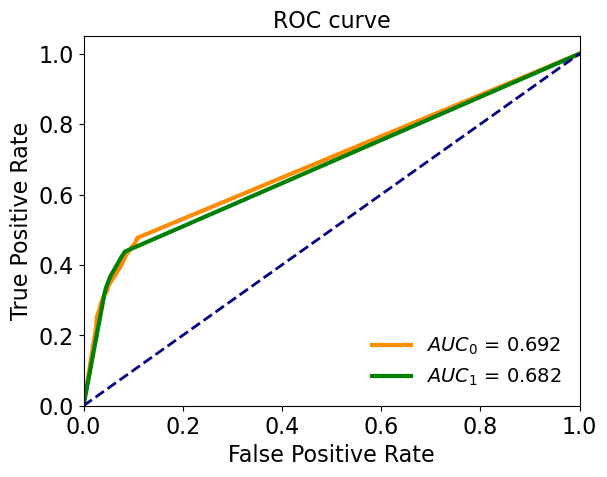

In [102]:
def adjusted_predict(X, thr=0.5):
    y_score = clf_dt.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

# fit
clf_dt = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=1, max_depth=None, criterion='gini', random_state=42)
clf_dt.fit(X_train, y_train)

# predict
y_pred = adjusted_predict(X_test, thr=0.1)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

# roc
y_score = clf_dt.predict_proba(X_test)
plot_roc(y_test, y_score)
plt.show()

# roc comparison
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
plot_ROC_comparison(fpr, tpr)

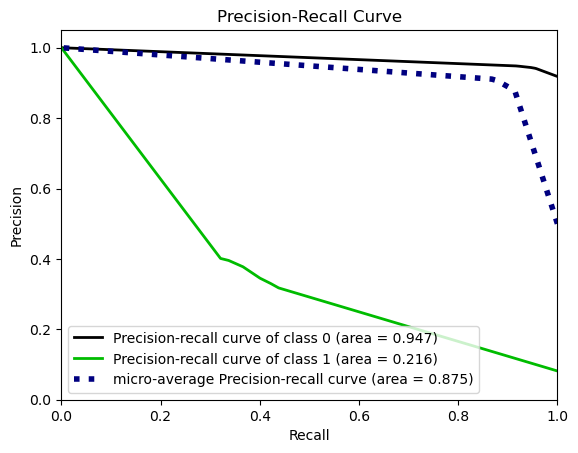

In [103]:
plot_precision_recall(y_test, clf_dt.predict_proba(X_test))
plt.show()

# Comparison among imbalanced techniques

In [104]:
models = {
    "Do Nothing":         clf_base,
    "RandomUnderSampler":     clf_rus,
    "CondensedNN":      clf_cnn,
    "EditedNN":         clf_enn,
    "TomekLinks":       clf_tl,
    "ClusterCentroids": clf_cc,
    "RandomOverSampler": clf_ros,
    "SMOTE":            clf_sm,
    "ADASYN":           clf_ad
}


In [105]:
from sklearn.metrics import confusion_matrix, classification_report, \
    f1_score, make_scorer, PrecisionRecallDisplay, RocCurveDisplay


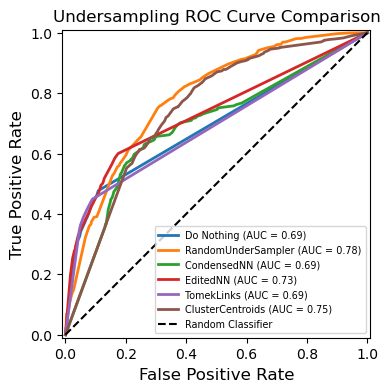

In [106]:
classifiers = [clf_base, clf_rus,clf_cnn, clf_enn, clf_tl, clf_cc]
labels = ['Do Nothing', 'RandomUnderSampler', 
          'CondensedNN', 'EditedNN', 'TomekLinks', 
          'ClusterCentroids', ]
fig, ax = plt.subplots(1,1, figsize = (6, 4))
for i, cls in enumerate(classifiers):
    roc = RocCurveDisplay.from_estimator(cls, X_test, y_test, ax = ax,
                                         name = labels[i], lw = 2)

random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
ax.set_title('Undersampling ROC Curve Comparison', fontsize=12)
ax.legend(fontsize = 'x-small')
ax.set_ylabel('True Positive Rate', fontsize = 12)
ax.set_xlabel('False Positive Rate', fontsize = 12)
# plt.savefig('imb_roc_comparison.pdf', bbox_inches = 'tight')
plt.show()

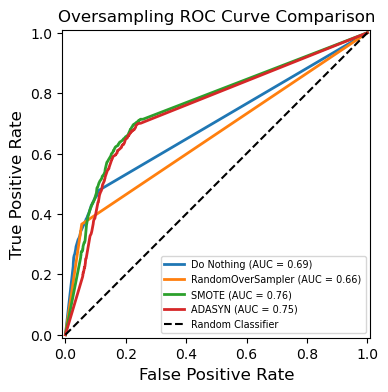

In [107]:
classifiers = [clf_base, clf_ros, clf_sm, clf_ad]
labels = ['Do Nothing', 'RandomOverSampler', 'SMOTE', 'ADASYN']

fig, ax = plt.subplots(1,1, figsize = (6, 4))
for i, cls in enumerate(classifiers):
    roc = RocCurveDisplay.from_estimator(cls, X_test, y_test, ax = ax,
                                         name = labels[i], lw = 2)
random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
ax.set_title('Oversampling ROC Curve Comparison', fontsize=12)
ax.legend(fontsize = 'x-small')
ax.set_ylabel('True Positive Rate', fontsize = 12)
ax.set_xlabel('False Positive Rate', fontsize = 12)
# plt.savefig('imb_roc_comparison.pdf', bbox_inches = 'tight')
plt.show()

In [108]:
classifiers = [clf_base, clf_rus,clf_cnn, clf_enn, clf_tl, clf_cc, clf_ros, clf_sm, clf_ad, clf_cw, clf_dt]
labels = ['NoImbalanceLearning', 'RandomUnderSampler', 
          'CondensedNN', 'EditedNN', 'TomekLinks', 
          'ClusterCentroids', 'RandomOverSampler', 'SMOTE', 'ADASYN', 'ClassWeight', 'DecisionThreshold', ]

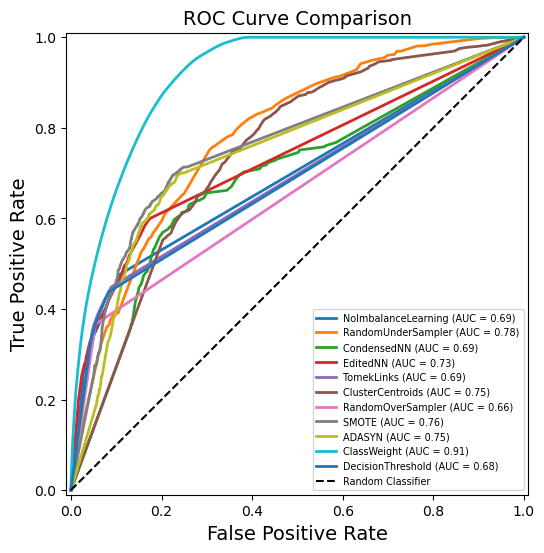

In [109]:

fig, ax = plt.subplots(1,1, figsize = (10, 6))
for i, cls in enumerate(classifiers):
    roc = RocCurveDisplay.from_estimator(cls, X_test, y_test, ax = ax,
                                         name = labels[i], lw = 2)

random = ax.plot(np.linspace(0,1,100), np.linspace(0,1,100), 'k--', 
                 label = 'Random Classifier')
ax.set_title('ROC Curve Comparison', fontsize=14)
ax.legend(fontsize = 'x-small')
ax.set_ylabel('True Positive Rate', fontsize = 14)
ax.set_xlabel('False Positive Rate', fontsize = 14)
# plt.savefig('imb_roc_comparison.pdf', bbox_inches = 'tight')
plt.show()

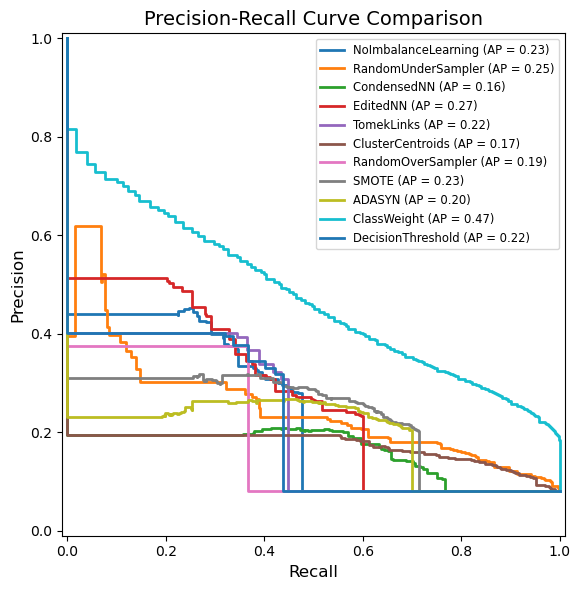

In [110]:
fig, ax = plt.subplots(1,1, figsize = (10, 6))
for i, clf in enumerate(classifiers):
    pr_display = PrecisionRecallDisplay.from_estimator(
        clf, X_test, y_test, ax=ax, name=labels[i], lw=2
    )

ax.set_title('Precision-Recall Curve Comparison', fontsize=14)
ax.set_xlabel('Recall', fontsize=12)
ax.set_ylabel('Precision', fontsize=12)
ax.legend(fontsize='small')
plt.tight_layout()
plt.show()